$\newcommand\E{{\mathbf E}}$
$\newcommand\indi[1]{{\mathbf 1}_{\displaystyle #1}}$
$\newcommand\inde[1]{{\mathbf 1}_{\displaystyle\left\{ #1 \right\}}}$
$\newcommand{\ind}{\inde}$
$\newcommand{\N}{{\mathbb N}}$
$\newcommand{\P}{{\mathbb P}}$
$\newcommand{\R}{{\mathbb R}}$
$\newcommand{\Z}{{\mathbb Z}}$
$\newcommand{\Var}{{\mathbf Var}}$


# Exemples d'utilisation de l'algorithme de Robbins et Monro
## Bernard Lapeyre
### Novembre 2019



# La loi forte comme un algorithme stochastique

On considère $(G_n,n\geq 0)$ une suite de gaussiennes centrées réduites
indépendantes. On pose $M_n=(G_1+\cdots+G_n)/n$

__Question 1.__ Vérifier que 
   $$
      M_{n+1} = M_n -\gamma_n \left(M_n - G_{n+1}\right),
   $$
   où $\gamma_n=1/(n+1)$. 
   
   Interpréter cette équation comme un
   algorithme stochastique. 
   
   Vérifier que l'on peut aussi prendre
   $\gamma_n=C /(n+1)^\beta$, si $1/2<\beta\leq 1$. Etudier informatiquement la convergence
   pour $\beta=0.75$ et $C=10$, $C=1$, $C=1/10$, $C=1/100$. Que se passe t'il lorsque
   $C$ est (trop) petit ?


In [196]:
import numpy as np;
import math;
import scipy.stats as stats;
import random;
import matplotlib.pyplot as plt;

def gamma(n,C,beta):
  return C / ((n+1)**beta);

def algorithme_rm(x_0,n,C,beta,F,G):
  X=np.zeros(n)
  X[0] = x_0
  for k in range(n-1):
    A_FAIRE
  return X

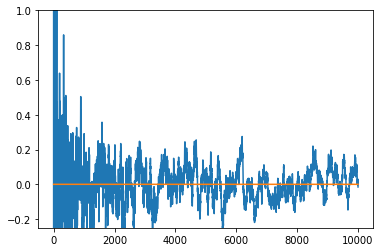

In [197]:
# Dans le cas de la loi forte, F(x,g)= (x-g) et f(x)=x-E(g)=x.
def F(x,g):
        return x - g

n=10000;

# Beaucoup de variance, la condition initiale est vite oubliee 
C=10;
beta=0.75;
x_0=1
G=np.random.normal(size=n);
X=algorithme_rm(x_0,n,C,beta,F,G);
plt.plot(X);
plt.plot(np.zeros(n));plt.ylim(-0.25,+1);plt.show()


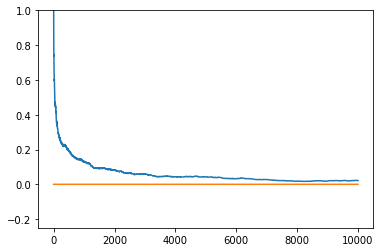

In [198]:
# Trés peu de variance, mais la condition initiale est moins vite oubliee 
A_FAIRE
X=...
plt.plot(X);
plt.plot(np.zeros(n));plt.ylim(-0.25,+1);plt.show()

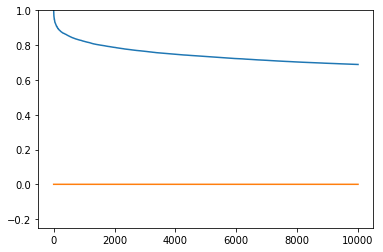

In [199]:
#   Pas de variance, mais la condition initiale 
#   a beaucoup de mal a etre oubliee !
A_FAIRE
X=...
plt.plot(X);
plt.plot(np.zeros(n));plt.ylim(-0.25,+1);plt.show()

L'optimum est obtenu pour $\beta=1$ et $C=1$ (La loi forte habituelle). Mais les performances se dégrade lorsque
l'on prend $C$ trop petit.

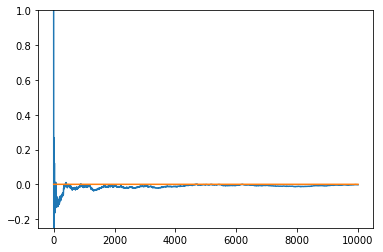

In [200]:
#   Le cas optimum.
A_FAIRE
X=...
plt.plot(X);
plt.plot(np.zeros(n));plt.ylim(-0.25,+1);plt.show()

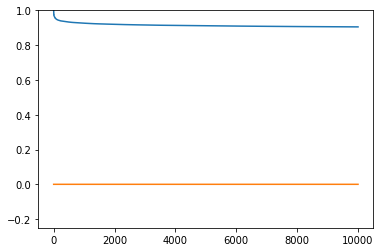

In [201]:
#   C est trop petit. Ca marche pas du tout.
A_FAIRE
X=...
plt.plot(X)
plt.plot(np.zeros(n));plt.ylim(-0.25,+1);plt.show()

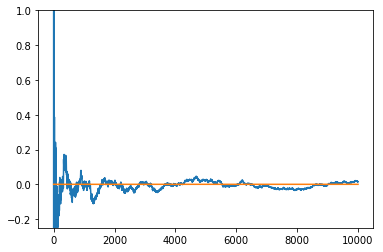

In [202]:
#  Il vaut mieux avoir C trop grand que trop petit.
A_FAIRE
X=...
plt.plot(X);
plt.plot(np.zeros(n));plt.ylim(-0.25,+1);plt.show()

__Question 2.0__ Le but est de vérifier le TCL pour les algorithme stochastiques. Lorsque $C=1$ et $\beta=1$, il s'agit dans ce cas du TCL "classique" i.i.d. On a vu en cours son domaine de validité. Donner la condition sur $C$ qui fait que
le TCL est vrai et vérifier que la variance asymptotique est donnée par $\frac{C^2}{2C-1}$ dans le cas particulier étudié.

Tester le TCL avec $C=0.6$, $C=1.0$, $C=1.5$, $C=2.0$.

0.8282866594385528
x_0 = 0 , C = 0.6 , Beta = 1.0 , n = 1000


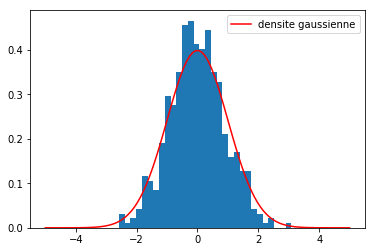

In [224]:
Beta=1.0;
C=0.6
x_0=0;
#Beta=0.75;
#C=1.0;

n=1000;
N=500;
z=np.zeros(N);
for i in range(N):
    G=np.random.normal(size=n);
    X=algorithme_rm(x_0,n,C,Beta,F,G);
    z[i]=X[n-1];

sigma=(C/math.sqrt(2*C-1))/math.sqrt(n)
z=z/sigma;# on normalise
print(np.var(z))
print('x_0 =',x_0,',','C =',C,',','Beta =',Beta,',','n =',n);

# La densité gaussienne de référence
x = np.linspace(-5,5,100)
densiteGaussienne = 1./np.sqrt(2*np.pi)*np.exp(-0.5*x**2)
plt.plot(x, densiteGaussienne, color="red", label="densite gaussienne")
plt.legend(loc="best")

plt.hist(z, density="True", bins=30, label="erreur normalisee");

# Calcul de fractile

Pour $p$ un seuil compris entre $0$ et $1$, on cherche à
calculer la valeur d'un fractile $x_p$ d'ordre $p$ d'une
gaussienne centrée réduite $G$. Montrer que $x_p$ est solution
d'un équation du type
$$
f(x_p) =\E\left(F(x_p,G)\right)=0,
$$
où $F$ est une fonction de $x$ et $G$ que l'on précisera.

 Ceci suggère d'utiliser l'algorithme de Robbins et Monro suivant:
  $$
  X_{n+1}=X_n - \gamma_n F(X_n,G_{n+1}),
  $$   
  où $(G_n,n\geq 1)$ est une suite de variables aléatoires gaussiennes
  centrées réduites et $\gamma_n=C/n^\beta$, où $0<\beta\leq 1$.
 
  On prendra pour $p=0.95$ (on cherche donc à approximer
  $x_p \approx 1.96$).

__Question 2.__  Implémenter cet algorithme et étudier la convergence pour
  $C=1$, $\beta=0.6$ et $C=1$, $\beta=0.8$.

  Dans le cas $\beta=0.75$, tester les valeurs $C=0.5$, $C=1.0$,
  $C=2.0$, $C=4.0$.
  
  Commenter les difficultés que l'on peut rencontrer.

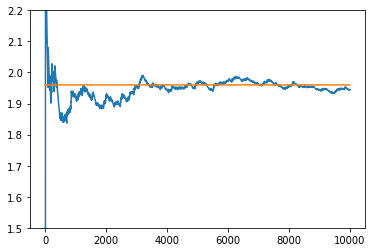

In [166]:
n=10000;

C=2;
Beta=0.75;
proba=0.95;
x_0=1.5;

def F(x,g):
     A_FAIRE

# Beaucoup de variance, la condition initiale est vite oubliée 
X=algorithme_rm(x_0,n,C,Beta,F,np.random.normal(size=n));
plt.plot(X);
plt.plot(1.96*np.ones(n));plt.ylim(1.5,+2.2);plt.show()

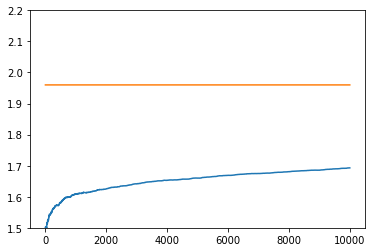

In [167]:
# Moins de variance, la condition initiale est moins vite oubliee 
A_FAIRE

proba=0.95;
x_0=1.5;

X=algorithme_rm(x_0,n,C,Beta,F,np.random.normal(size=n));
plt.plot(X);
plt.plot(1.96*np.ones(n));plt.ylim(1.5,+2.2);plt.show()

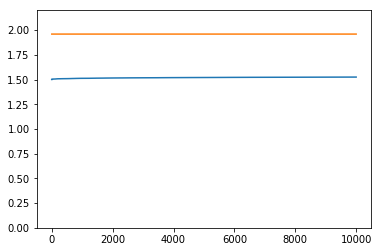

In [168]:
#  Pas de variance, mais la condition initiale 
#  a vraiment beaucoup de mal a etre oubliee !
A_FAIRE

x_0=1.5;

X=algorithme_rm(x_0,n,C,Beta,F,np.random.normal(size=n));
plt.plot(X);
plt.plot(1.96*np.ones(n));plt.ylim(0,+2.2);plt.show()

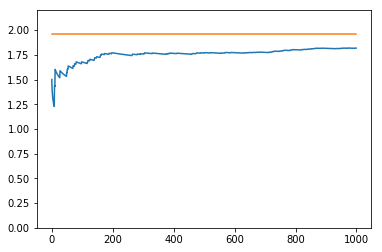

In [169]:
#   Cas beta=1
A_FAIRE

Beta=1;
x_0=1.5;
n=1000;

X=algorithme_rm(x_0,n,C,Beta,F,np.random.normal(size=n));
plt.plot(X);
plt.plot(1.96*np.ones(n));plt.ylim(0,+2.2);plt.show()

__Question 3.__ Montrer que la pente de la fonction $f$ en $x_p$ est donnée par 
$$
   c^*= {2e^{-\frac{x_p^2}{2}}}/{\sqrt{2\pi}}.
$$
Pour quelle valeur de $C$ peut on s'attendre à obtenir un TCL ?

Verifier le théorème de la limite centrale pour cet algorithme sous
cette condition.

C= 8.555645458894494 , Beta= 1.0 , n= 1000


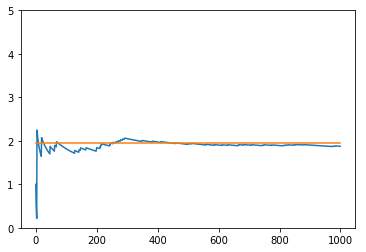

In [172]:
# La valeur pour avoir le TCL 2c^* alpha > 1
def alpha_star(x_star):
    c_star=2*math.exp(-x_star**2/2)/math.sqrt(2*math.pi);
    return 1/(2*c_star);

n=1000;
Beta=1.0;
C=2.0*alpha_star(1.96);
x_0=1.0;

print('C=',C,',','Beta=',Beta,',','n=',n);

G=np.random.normal(size=n);
X=algorithme_rm(x_0,n,C,Beta,F,G);
plt.plot(X);
plt.plot(1.96*np.ones(n));plt.ylim(0,+5);plt.show()

# Optimisation du paramètre d'une fonction d'importance importance

On veut calculer $\E(f(G))$. Comme 
$$
  \E\left(e^{-\lambda G - \frac{\lambda^2}{2}} f(G+\lambda)\right)
    = \E(f(G)),
$$
On cherche a minimiser en $\lambda$ la variance de 
$
   X_\lambda = e^{-\lambda G - \frac{\lambda^2}{2}} f(G+\lambda).
$
Notez que l'on a (cours)
$$
\Var\left(X_\lambda\right) 
  = \E\left(e^{-\lambda G + \frac{\lambda^2}{2}} f^2(G)\right) - \E(f(G))^2.
$$
On traitera le cas du call dans le modèle de Black et Scholes avec les paramètres suivants
$r=2\%$, $\sigma=30\%/\mbox{an}$, $S_0=x=100$, $T=1$.

__Question 1.1.__ Tracer (une approximation Monte-Carlo de) la courbe $\lambda \to \Var(X_\lambda)$ lorsque $K=100$.

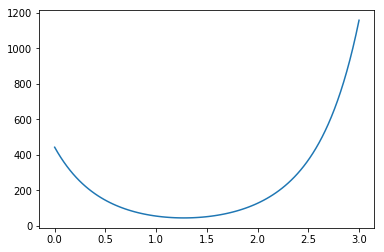

In [176]:
r=0.02;
sigma=0.3;
T=1;
x=100;

def f(g):
    d=np.size(g);
    S_T=np.zeros(d);
    S_T= x * np.exp((r - sigma*sigma/2)*T*np.ones(d)+sigma*np.sqrt(T)*g);
    return math.exp(-r*T)*np.maximum(S_T-K*np.ones(np.size(S_T)),np.zeros(np.size(S_T)));


def approx_variance(Lambda,G):
    # ATTENTION: G est un vecteur echantillon de gaussiennes
    A_FAIRE

K=100;
n=1000;
Lambda = np.linspace(0,3,100)
z=np.zeros(np.size(Lambda));
G=np.random.normal(size=n);
for i in range(np.size(Lambda)):
    z[i]=approx_variance(Lambda[i],G);
    #print(Lambda[i],z[i])
plt.plot(Lambda,z);


__Question 1.2.__ Reprendre la simulation précédente avec $K=200$.

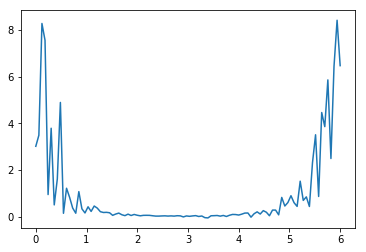

In [177]:
K=200;
Lambda = np.linspace(0,6,100)

A_FAIRE


__Question 2.__ Montrer que la dérivée peut s'écrire sous les deux formes suivantes
$$
   \frac{\partial}{\partial \lambda}\Var\left(X_\lambda\right)
   =  \E\left((\lambda - G)e^{-\lambda G + \frac{\lambda^2}{2}} f^2(G)\right)
   =  - \E\left( G e^{-2\lambda G - \lambda^2} f^2(G+\lambda)\right).
$$
Vérifier ce fait par simulation en tracant les deux approximations
Monte-Carlo de la dérivées. Laquelle de ces deux représentations vous
parait elle préférable du point de vue de la simulation ?

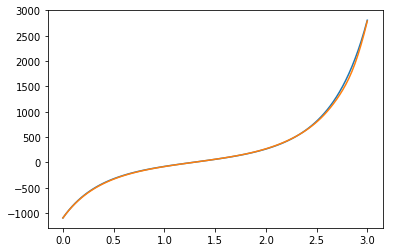

In [178]:
r=0.02;
sigma=0.3;
T=1;
x=100;

def approx_1_derivee_variance(Lambda):
    A_FAIRE
    return np.mean(Y);

def approx_2_derivee_variance(Lambda):
    A_FAIRE
    return np.mean(Y)

n=10000;

K=100;
Lambda=np.linspace(0,3,100)
z1=np.zeros(np.size(Lambda));
z2=np.zeros(np.size(Lambda));
G=np.random.normal(size=n);
for i in range(np.size(Lambda)):
    z1[i]=approx_1_derivee_variance(Lambda[i]);
    z2[i]=approx_2_derivee_variance(Lambda[i]);
plt.plot(Lambda,z1);
plt.plot(Lambda,z2);

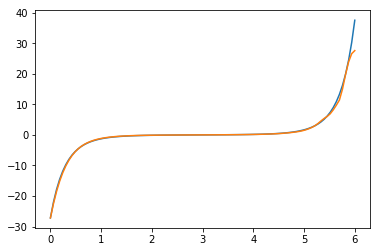

In [182]:
n=10000
K=200
Lambda=np.linspace(0,6,100)

A_FAIRE


# __La méthode de projection de Chen__

On chercher à résoudre $\frac{\partial}{\partial
  \lambda}\Var\left(X_\lambda\right)=0$ en utilisant un algorithme de type
Robbins et Monro utilisant la première représentation
de la dérivée. 

On prendra $K=200$.

Pour cela, on pose $X_0=0$, puis
$$
   X_{n+1}=X_n 
     -\gamma_n (\lambda - G_{n+1})e^{-\lambda G_{n+1} + \frac{\lambda^2}{2}} f^2(G_{n+1}).
$$

__Question 3.__ Implémenter cet algorithme de façon directe (sans borner l'algorithme).
Constater l'instabilité de cet algorithme. Quelle hypothèse permettant
de prouver la convergence n'est pas vérifiée ? 

On essaye quand même, mais ne pas s'étonner si l'on rencontre quelques problèmes !

/home/bl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/bl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


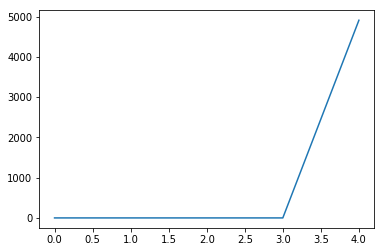

In [183]:
def gamma(n,C,beta):
    return C / ((n+1)**beta);

r=0.02;
sigma=0.3;
T=1;
x=100;
K=100;

def F(Lambda,g):
    return A_FAIRE

C=0.5;
beta=1.0;
n=10000;
G=np.random.normal(size=n);
x_0=0;

X=algorithme_rm(x_0,n,C,beta,F,G);
plt.plot(X)

__Question 4.__ Implémenter cet algorithme en ramenant $X_n$ à une valeur initiale commune lorsque $X_n$ dépasse la
valeur de $5$ (procédure dite de ``projection de Chen''). Vérifier que
l'algorithme converge (mieux!).

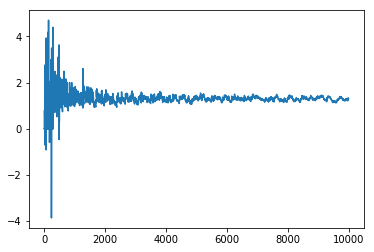

In [184]:
def algorithme_rm_chen(x_0,MAX,n,C,beta,F,G):
    X=np.zeros(n);
    X[0] = x_0;
    for k in range(n-1):
        X[k+1]=X[k]-gamma(k,C,beta)*F(X[k],G[k]);
        if(abs(X[k+1]) >= MAX): 
            A_FAIRE
    return X
            
r=0.02;
sigma=0.3;
T=1;
x=100;
K=100;

C=0.5;
beta=1.0;
Lambda0=0;
#Lambda0=(math.log(K/x)-(r-sigma**2/2)*T)/(sigma*math.sqrt(T));
MAX=5;
n=10000;

G=np.random.normal(size=n)
Y=algorithme_rm_chen(Lambda0,MAX,n,C,beta,F,G);
plt.plot(Y);plt.show()

__Question 5.__ Proposer un algorithme basée sur la deuxième représentation de
  la dérivée. Lequel de ces deux algorithmes vous parait le plus
  pertinent.